首先读取数据

In [193]:
import pickle
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
plt.rcParams['font.family'] = ['Simhei']  # 中文显示

设置相应的超参数

In [194]:
d1,d2=2500,2500
w1,w2=40,40


window_size = 100  # 窗口大小,导致线平缓度
poly_order = 4    # 多项式阶数

In [195]:

#由你的电脑的屏幕大小来决定
screen_width,screen_height=3072,1920

#print(screen_wide,screen_high  )

def read_data(d1,d2,w1,w2):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas

mouse_move=read_data(d1,d2,w1,w2)

In [196]:
T=[]
X=[]
Y=[]
for k in range(len(mouse_move)):
    t=[]
    x=[]
    y=[]
    for i in range(len(mouse_move[k])):
        #print(mouse_move[0][i])
        t.append(mouse_move[k][i][0]-mouse_move[k][0][0])
        x.append(mouse_move[k][i][1])
        y.append(mouse_move[k][i][2])   
    T.append(t)
    X.append(x)
    Y.append(y)

In [197]:

S=[]

for i in range(len(T)):
    l=0
    s=[0,]#点在轨迹上的位置
    for j in range(1,len(T[i])):
        l+=np.sqrt((X[i][j]-X[i][j-1])**2+(Y[i][j]-Y[i][j-1])**2)
        s.append(l)
    S.append(s)



In [198]:
T_all=[]
S_all=[]

for i in range(len(T)):
    T_all.append(T[i][-1])
    S_all.append(S[i][-1])
print(T_all)
print(S_all)

t0=[]
t1=[]
T_less=[]

for i in range(len(T)):
    for j in range(len(T[i])):
        if S[i][j]!=S[i][j+1]:
            t0.append(T[i][j])
            break
    for j in range(len(T[i])):
        if S[i][-j]!=S[i][1-j]:
            t1.append(T[i][-j])
            break
    T_less.append(t1[i]-t0[i])

print(t0)
print(t1)
print(T_less)


[0.47757887840270996, 0.5600094795227051, 0.5736265182495117, 0.4742739200592041, 0.4683420658111572, 0.4538252353668213, 0.39447569847106934, 0.39920735359191895, 0.5345907211303711, 0.41143369674682617, 0.39626526832580566, 0.4437389373779297, 0.431781530380249, 0.4261507987976074, 0.3971996307373047, 0.48601627349853516, 0.47679853439331055, 0.40267252922058105, 0.4372842311859131, 0.40924811363220215, 0.46208739280700684, 0.36330318450927734, 0.30770230293273926, 0.36818838119506836, 0.3560326099395752, 0.37267160415649414, 0.384429931640625, 0.3252222537994385, 0.43659019470214844, 0.38097643852233887, 0.4216735363006592, 0.37300992012023926, 0.3835146427154541, 0.43041324615478516, 0.39938807487487793, 0.40645265579223633, 0.38844895362854004, 0.39935827255249023, 0.3990154266357422, 0.4352905750274658, 0.4280827045440674]
[2359.1518317639016, 2537.6859638448122, 2074.0622577482986, 2048.241155137324, 2298.0, 2306.446954055283, 1885.2132034355964, 2082.4852813742386, 1940.8838122

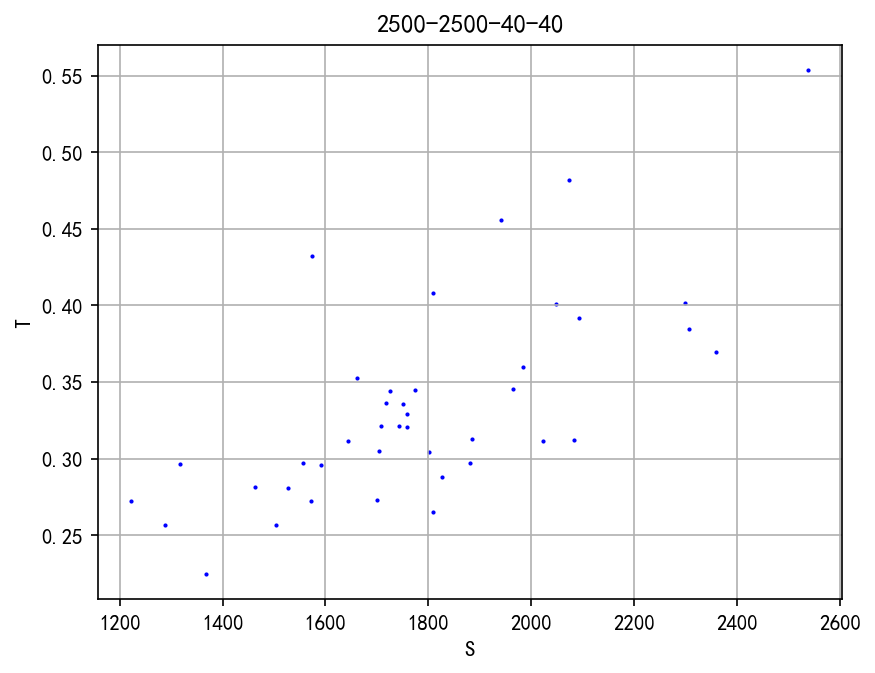

In [199]:
plt.figure(dpi=150)
plt.scatter(S_all,T_less, c='b', label='L', s=1)
#plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
plt.xlabel('S')
plt.ylabel('T')
#plt.legend()
plt.grid()
plt.show()

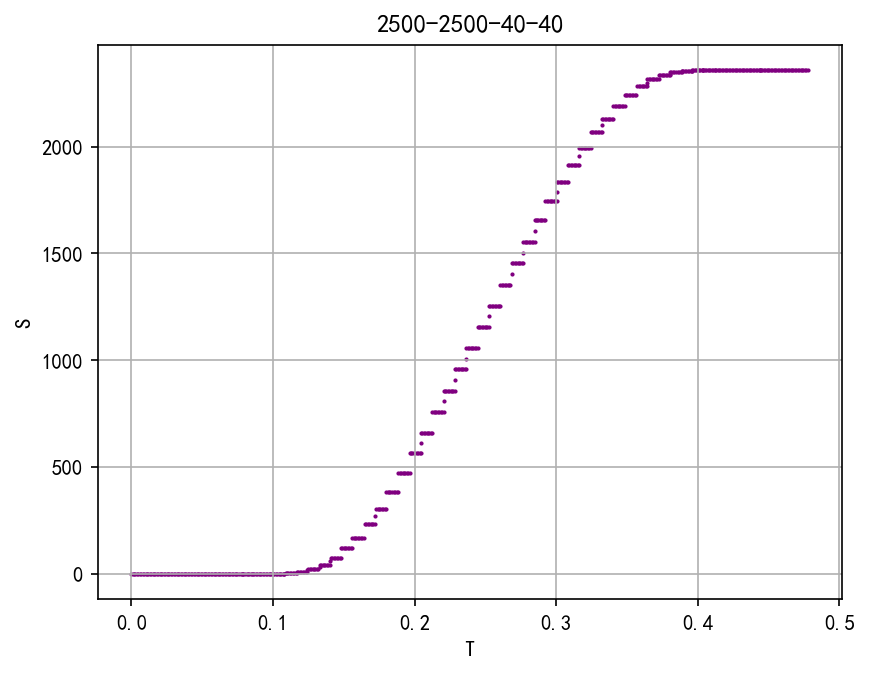

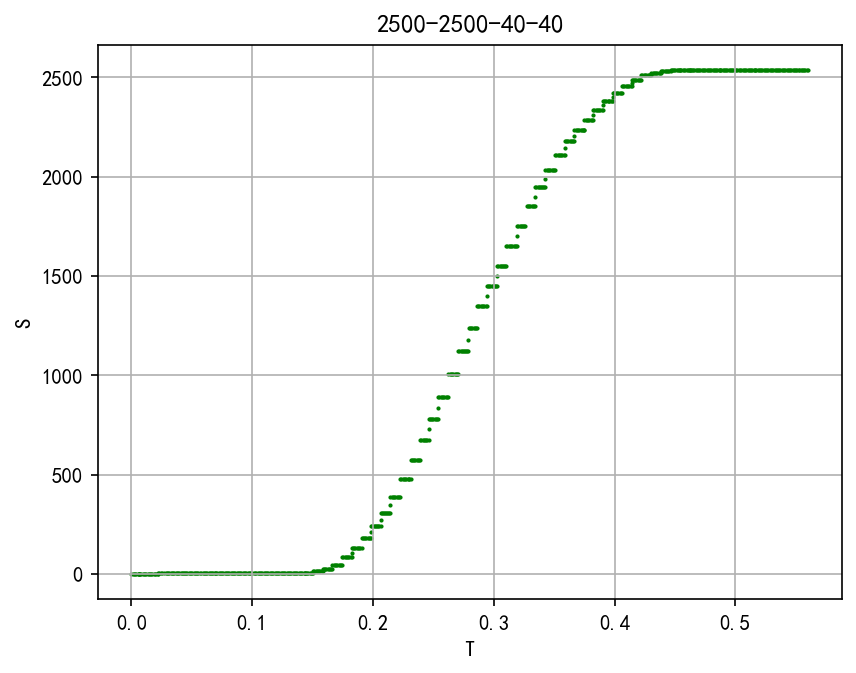

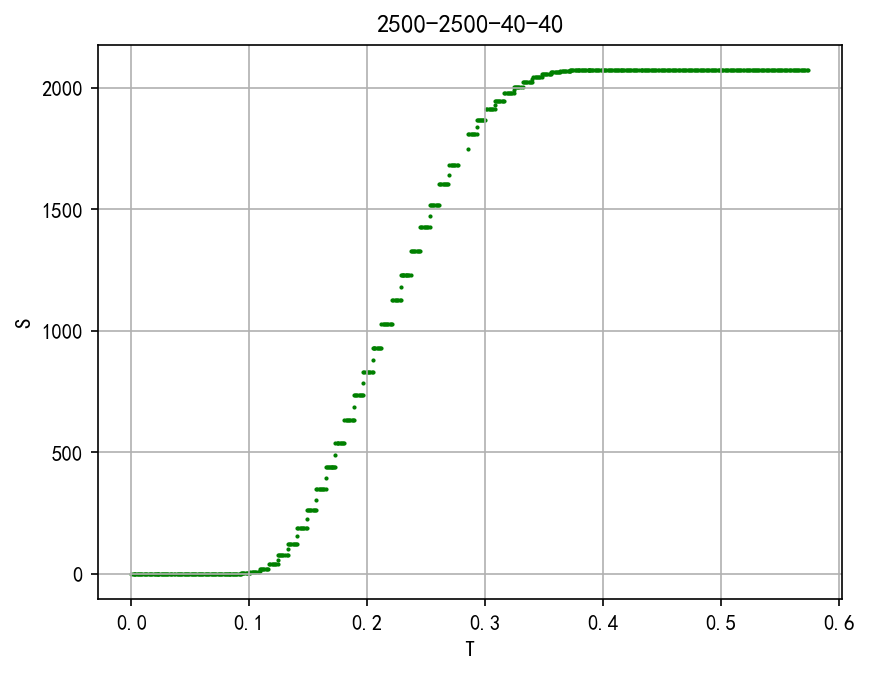

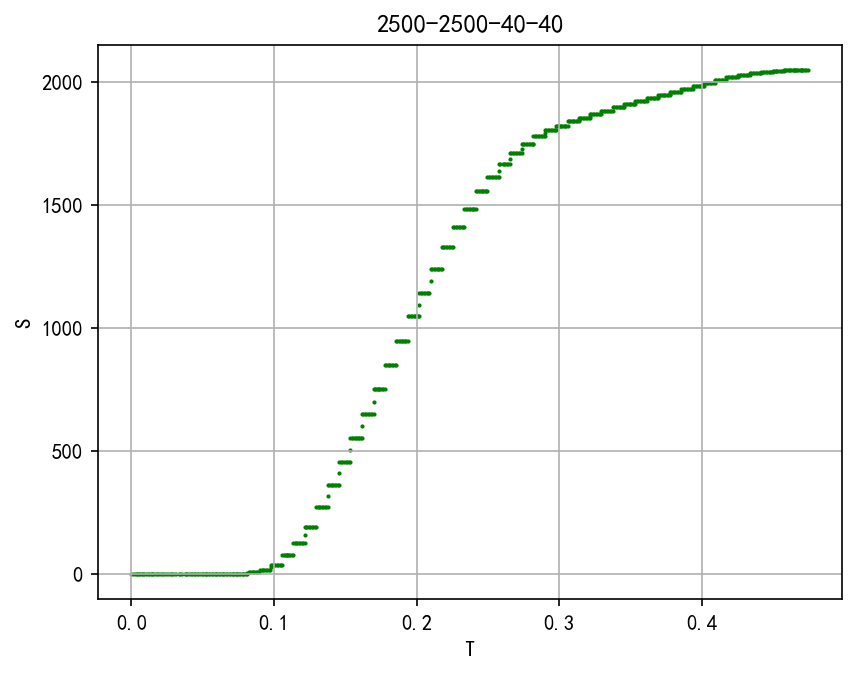

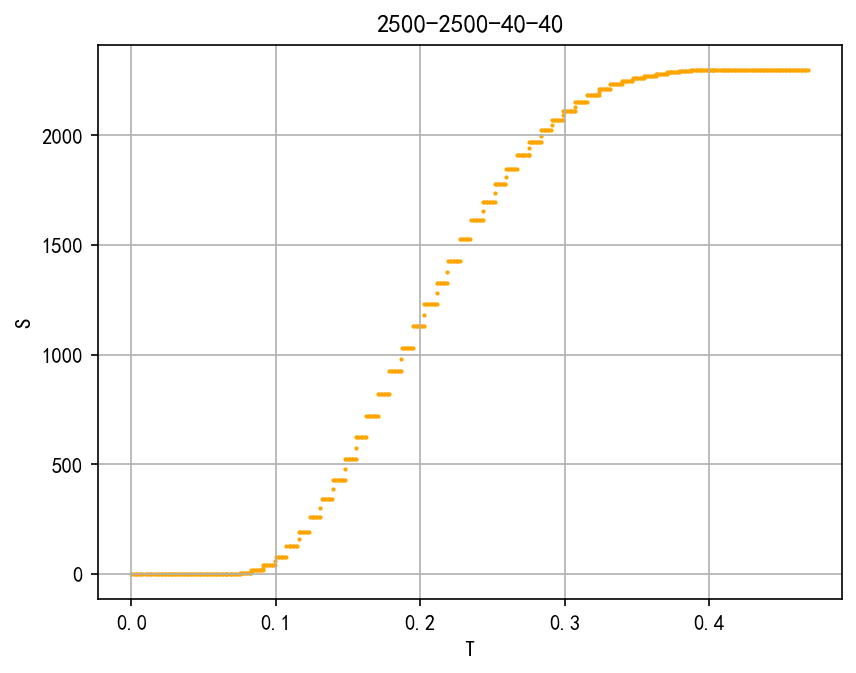

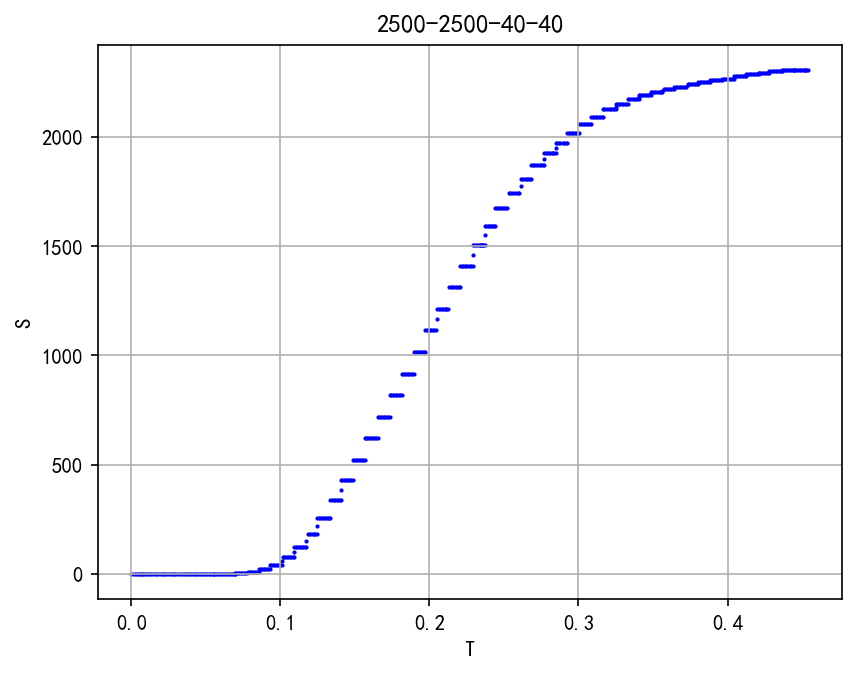

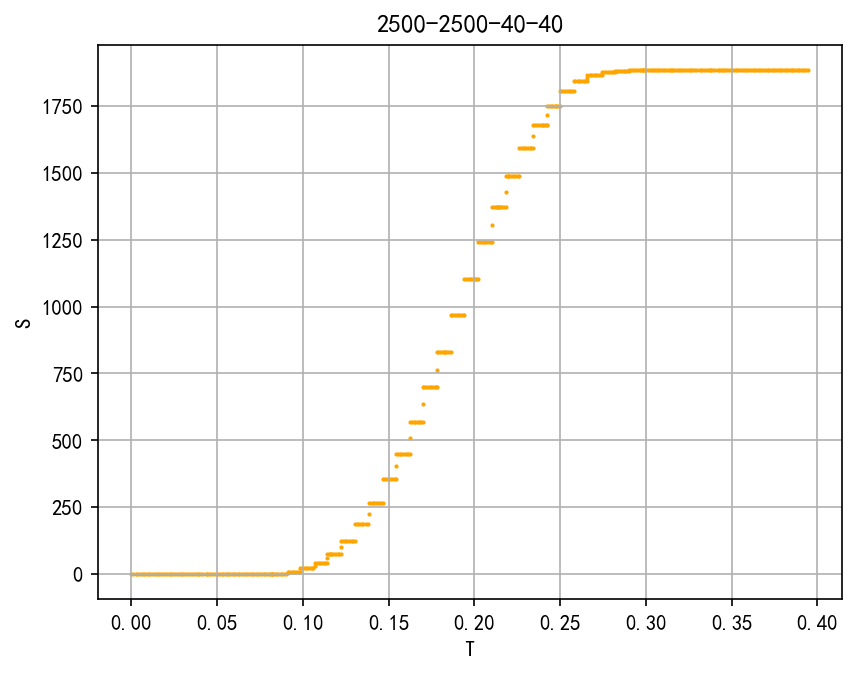

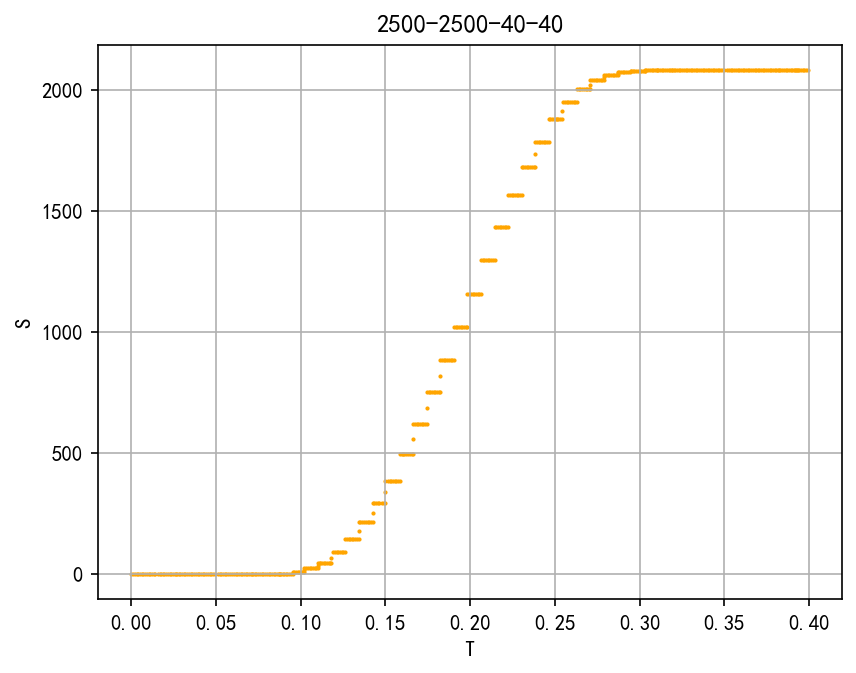

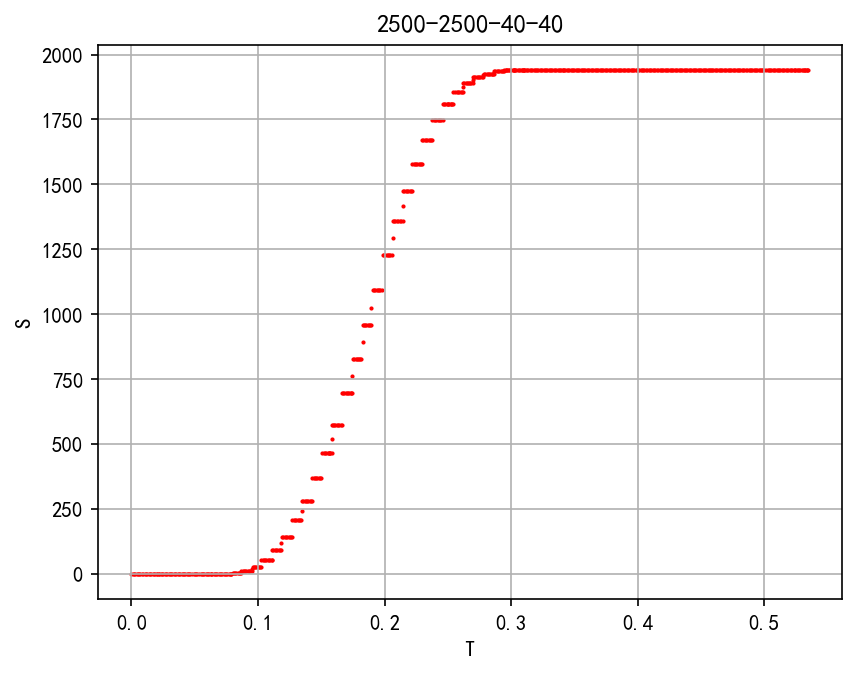

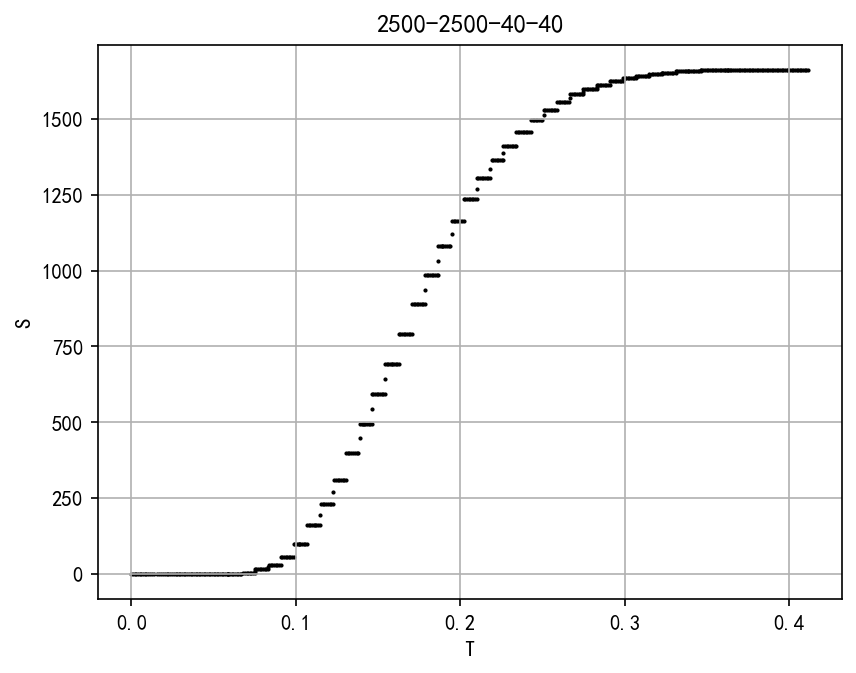

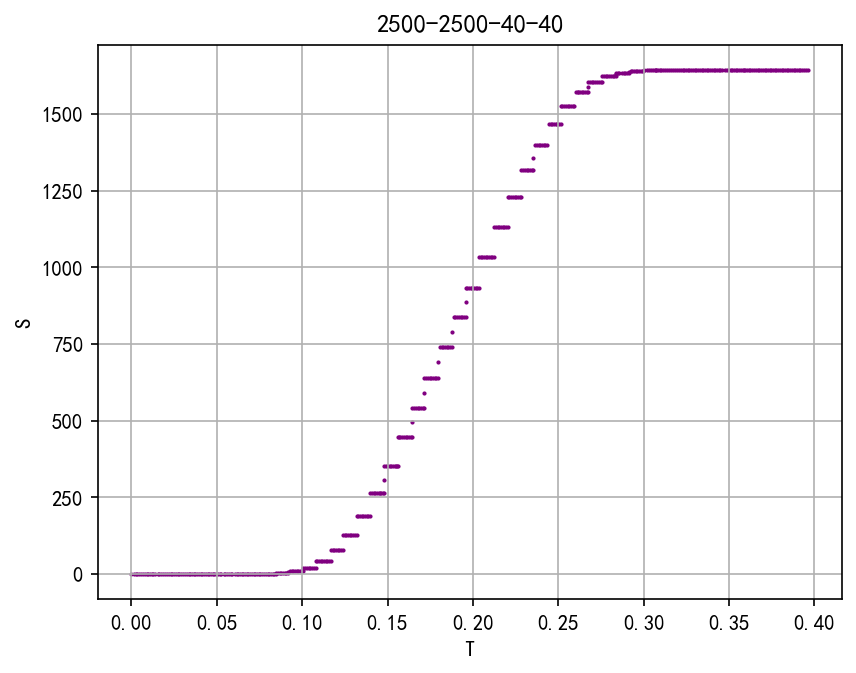

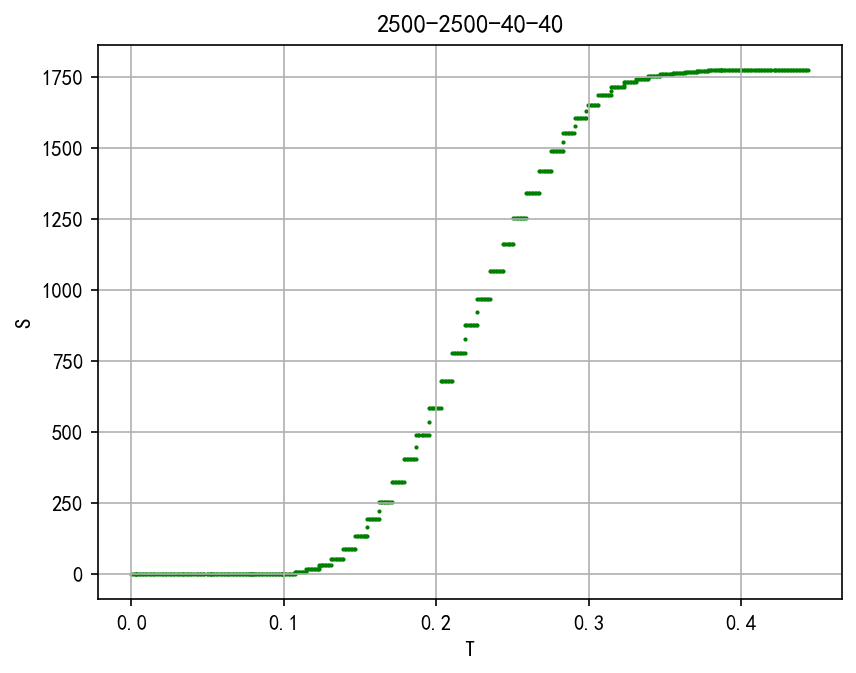

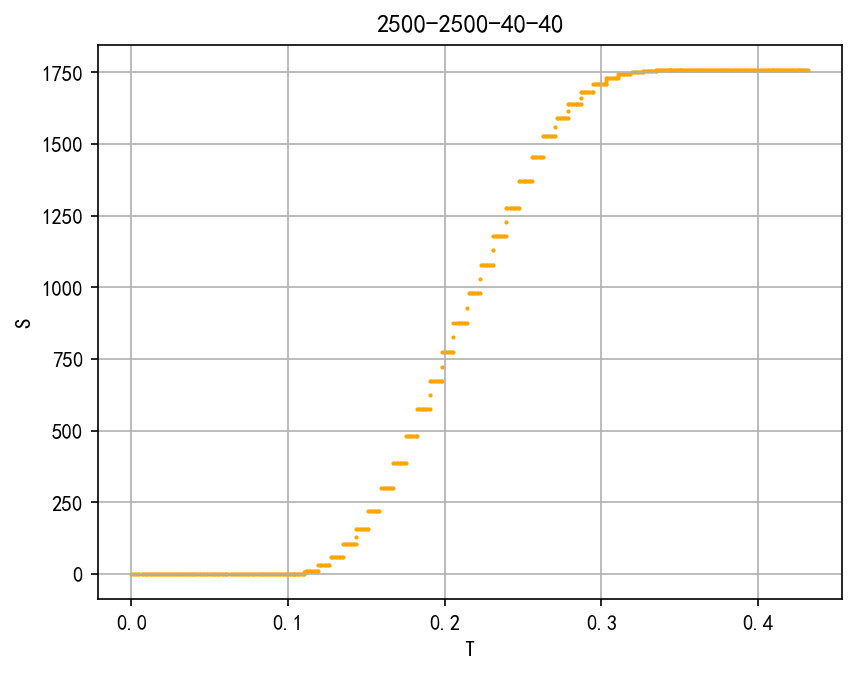

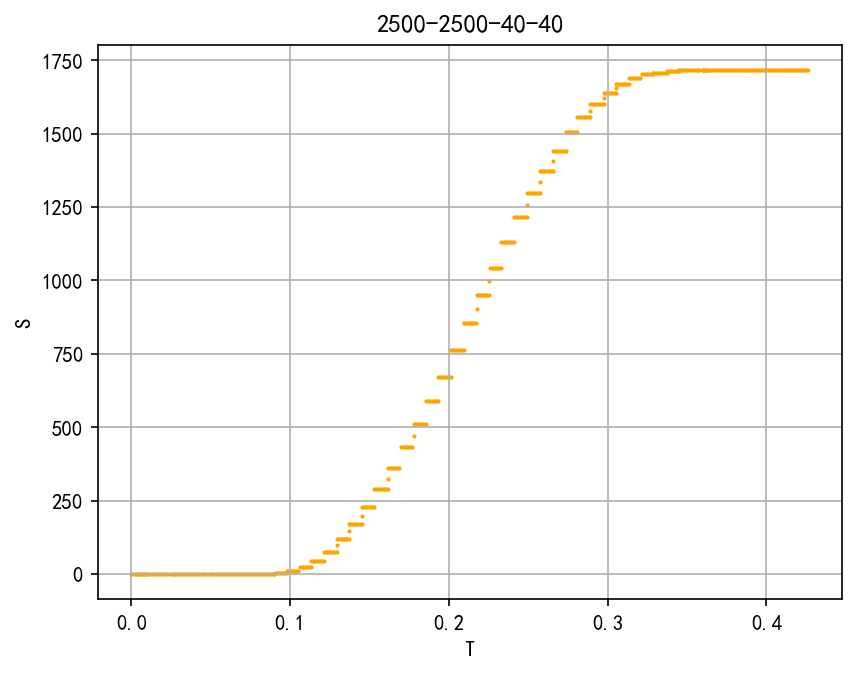

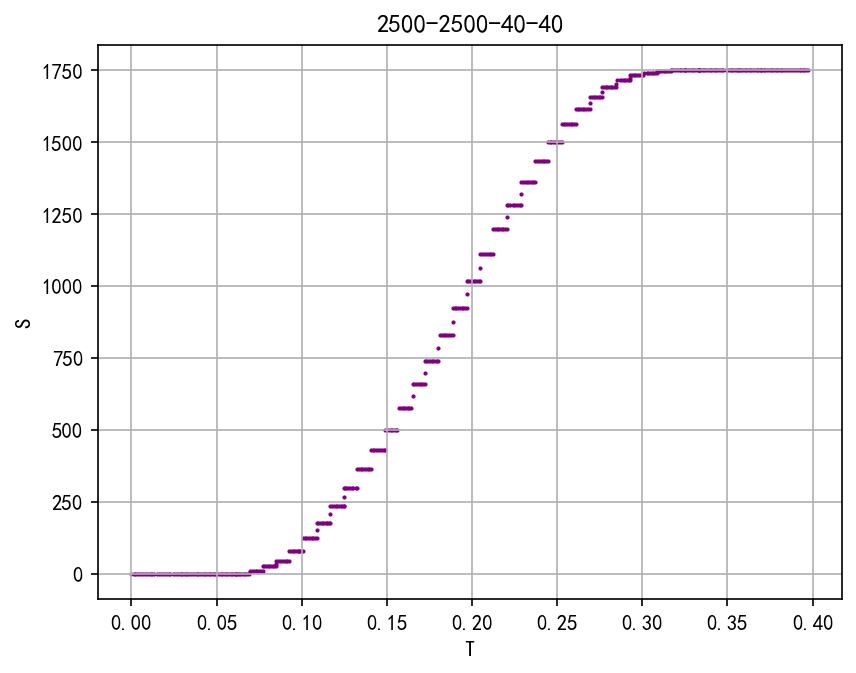

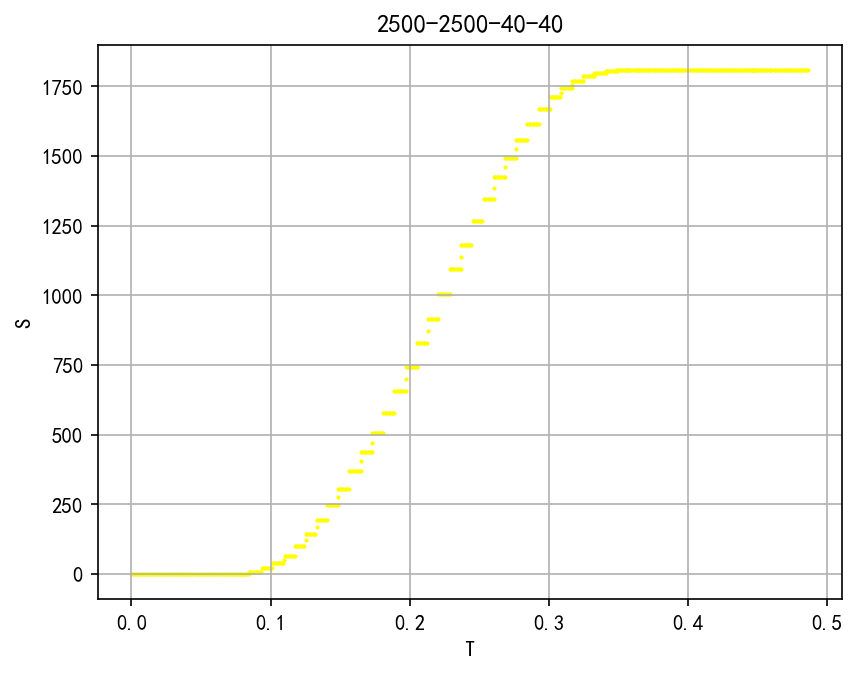

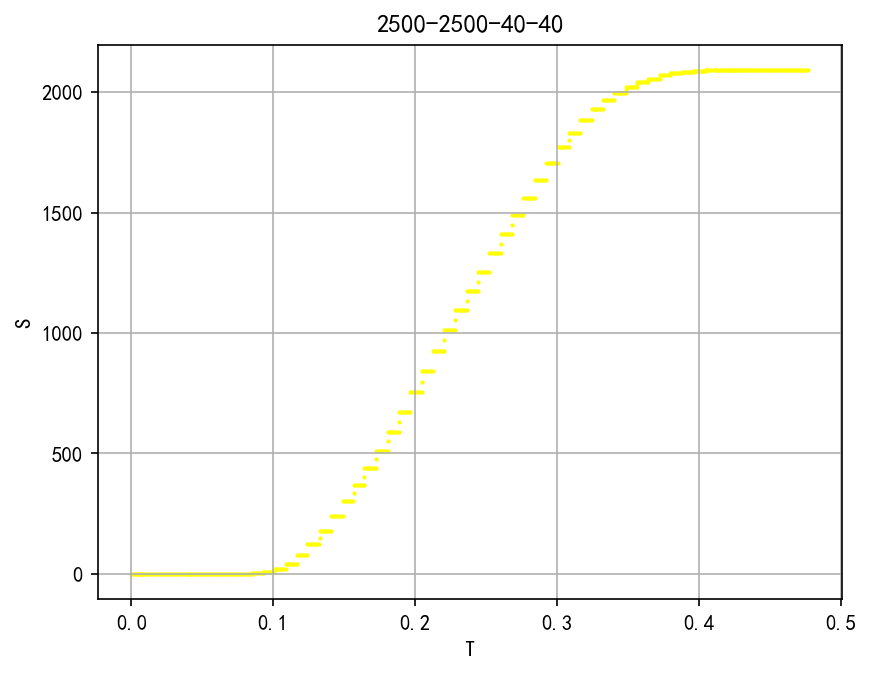

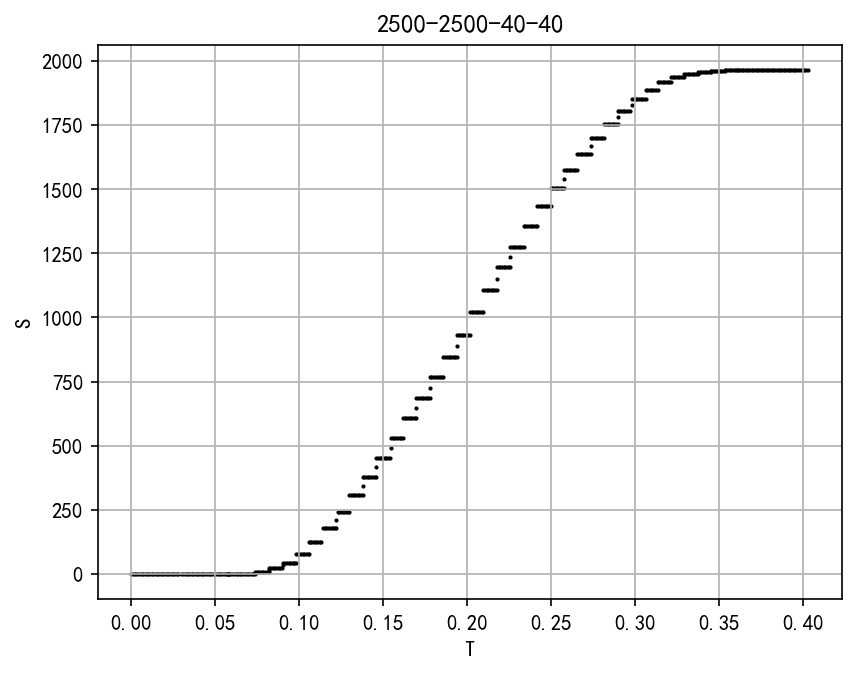

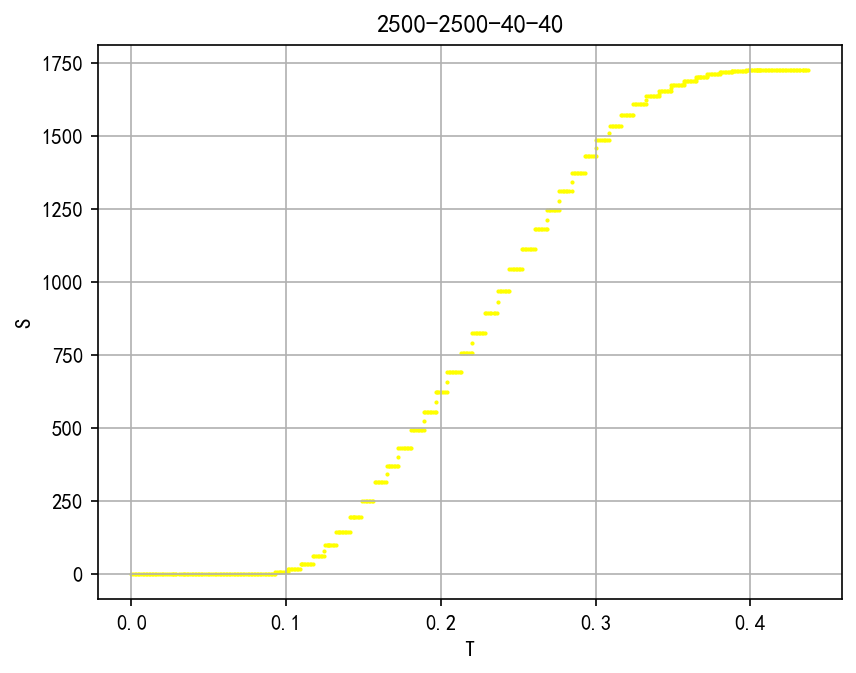

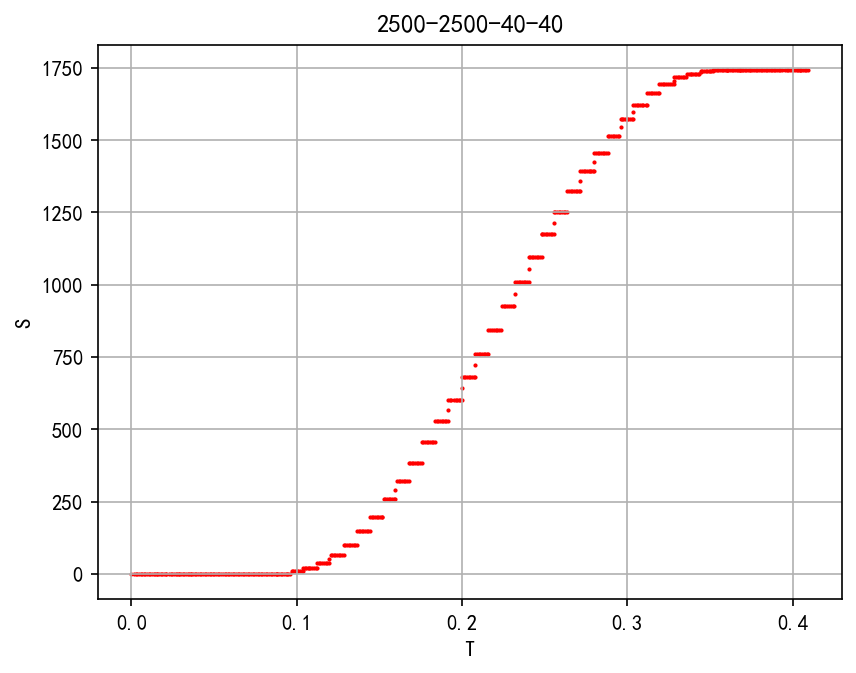

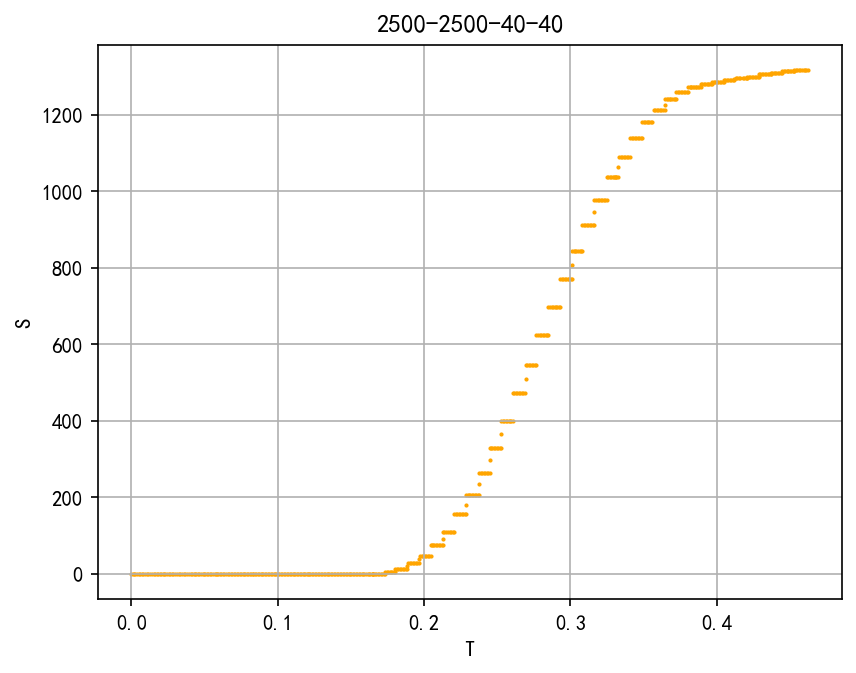

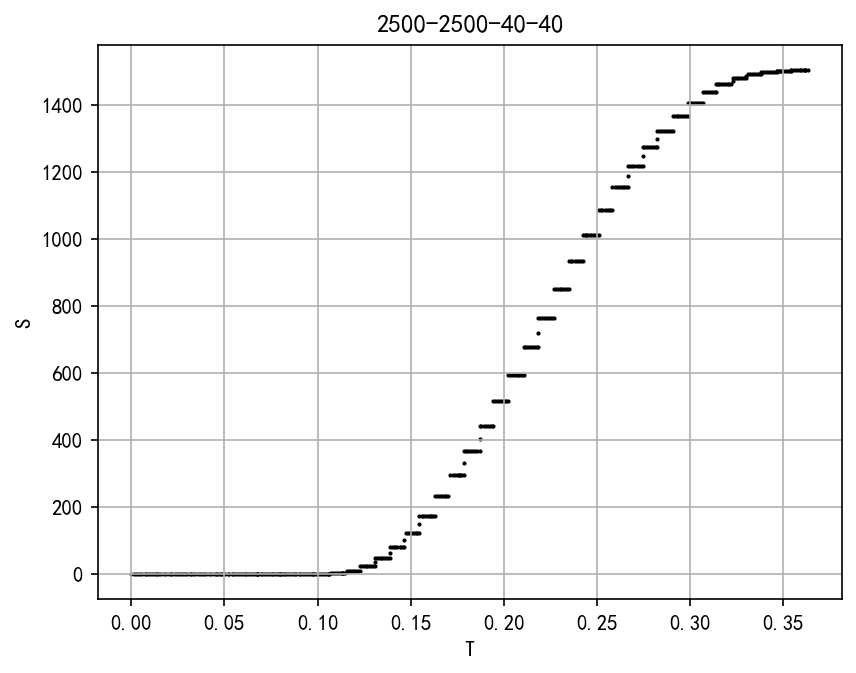

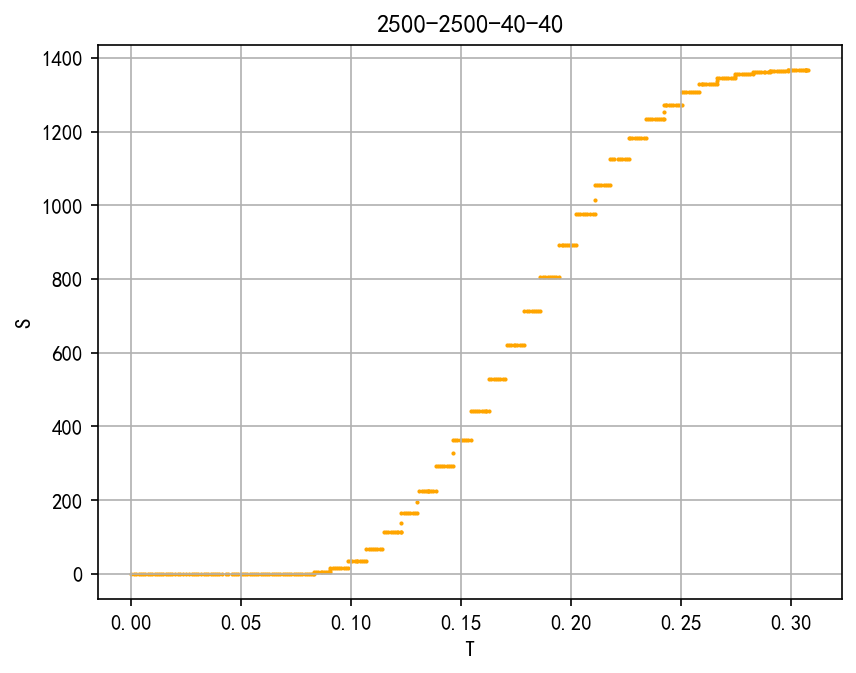

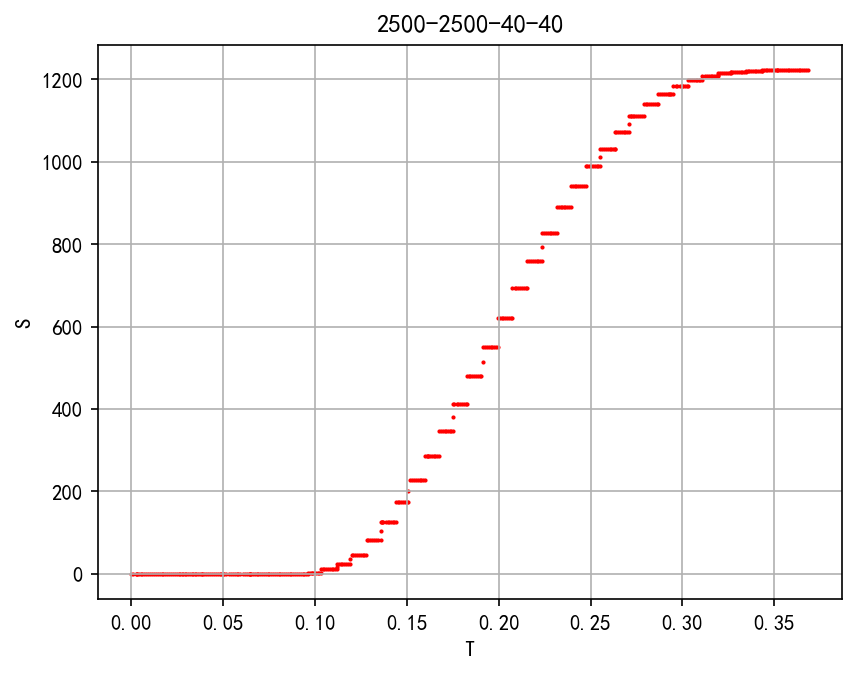

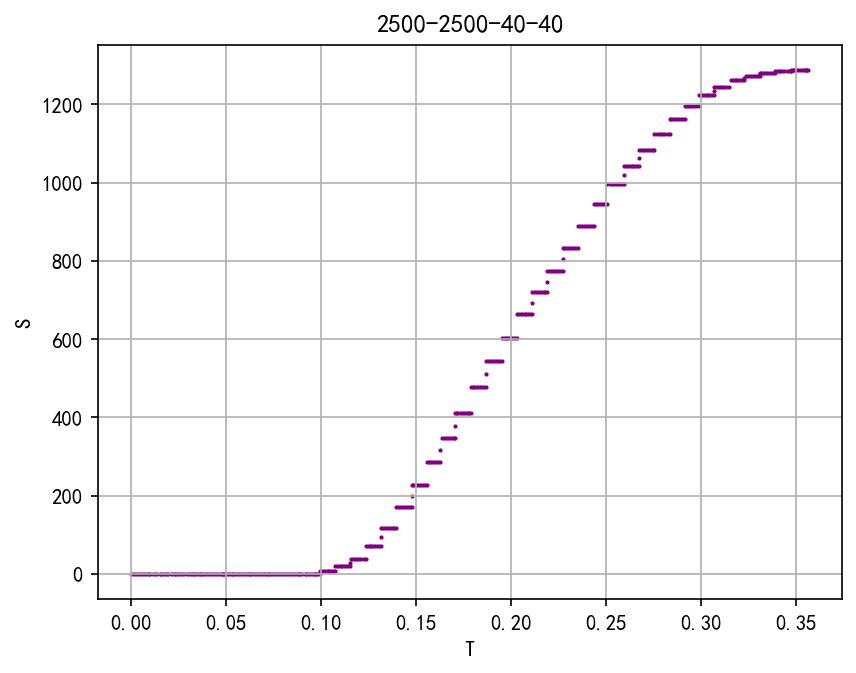

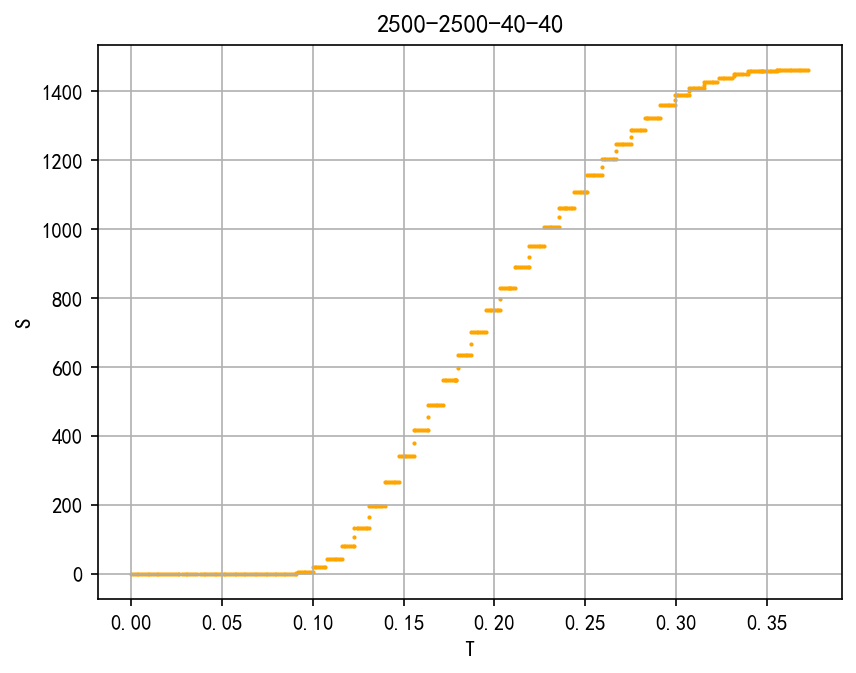

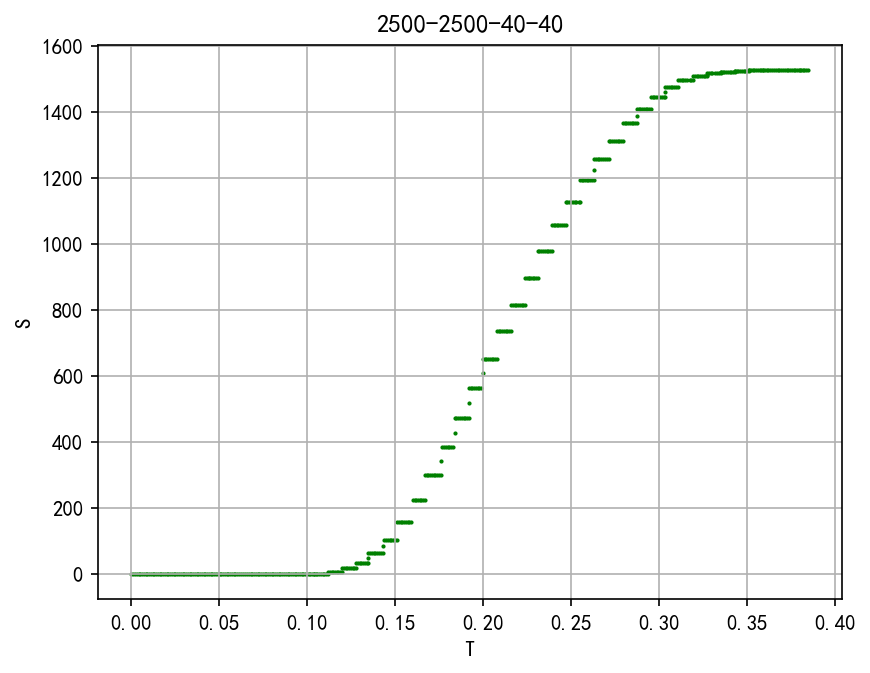

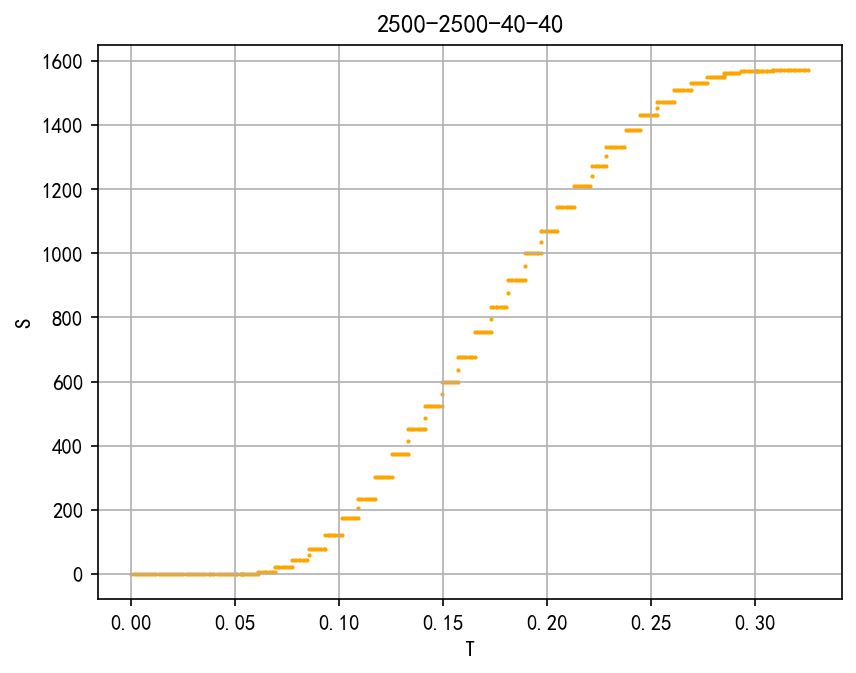

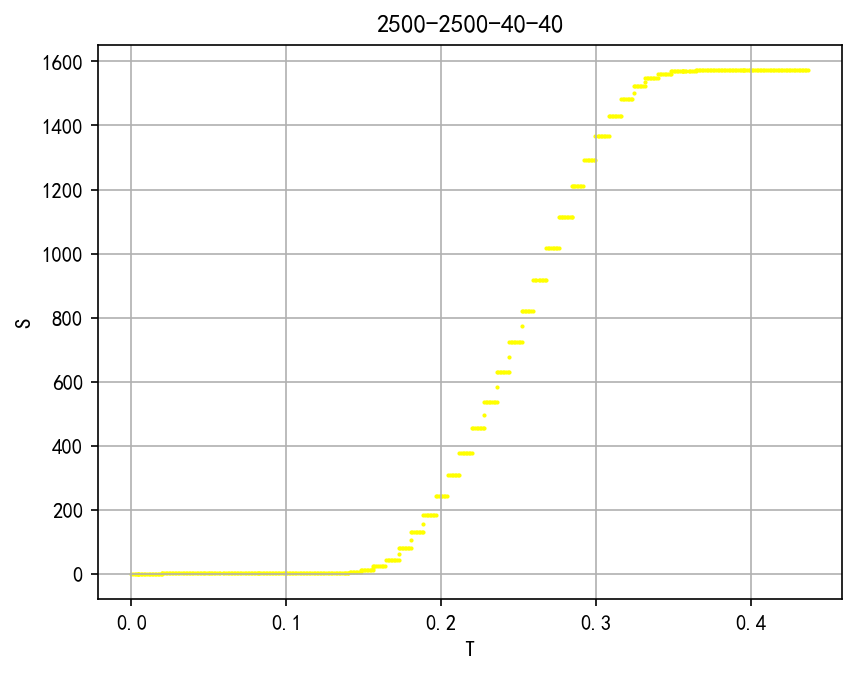

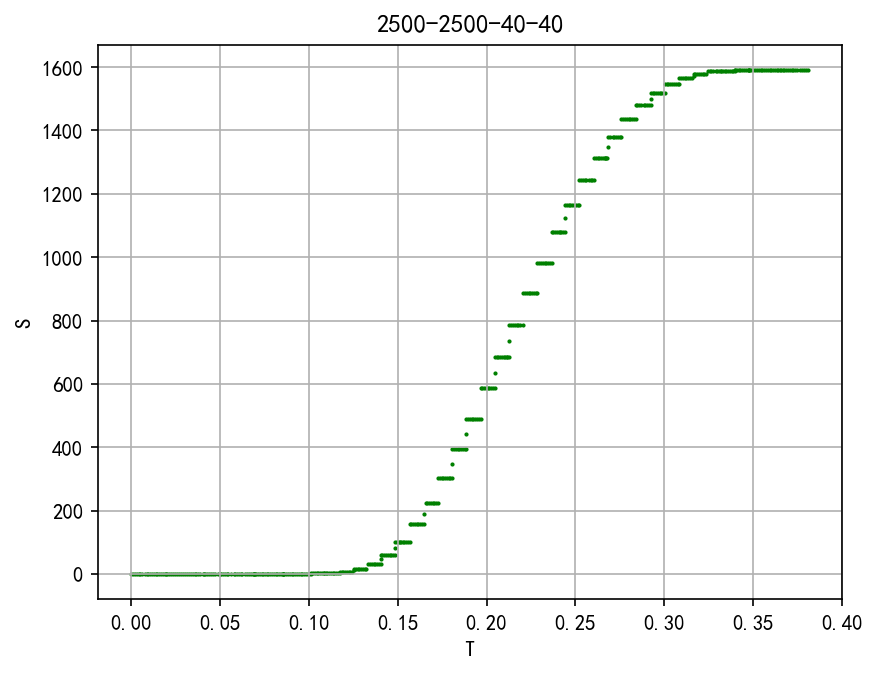

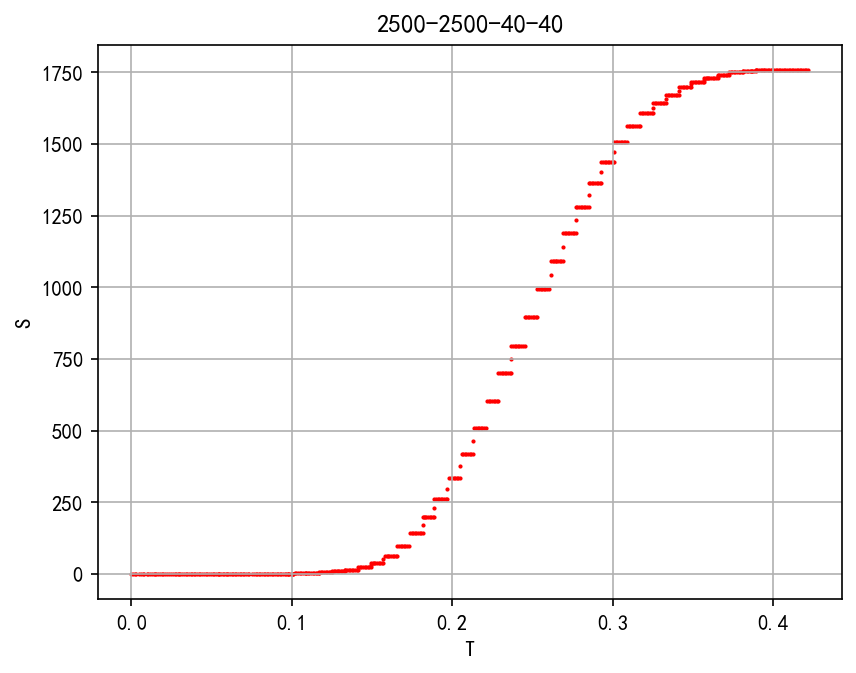

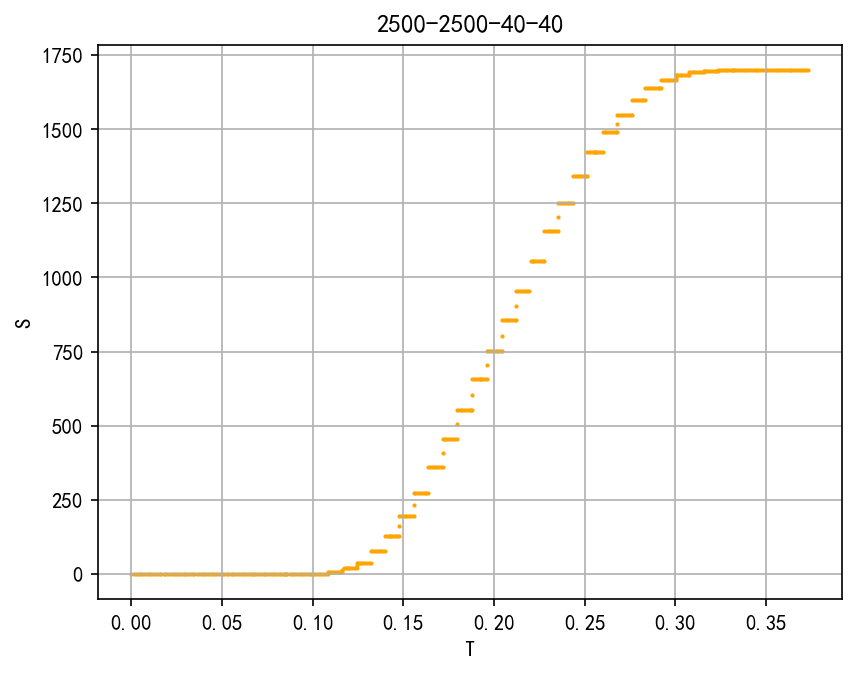

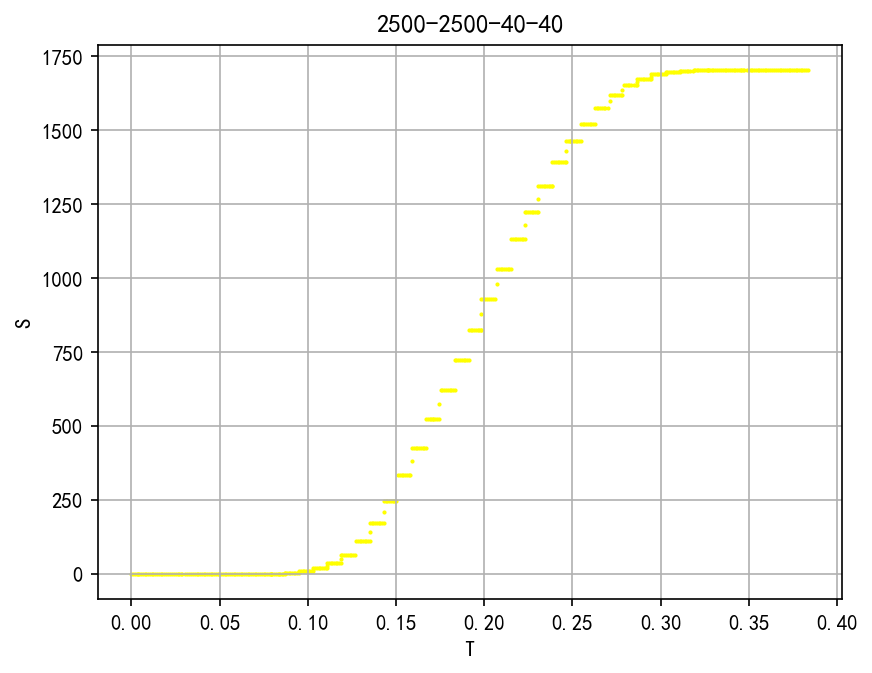

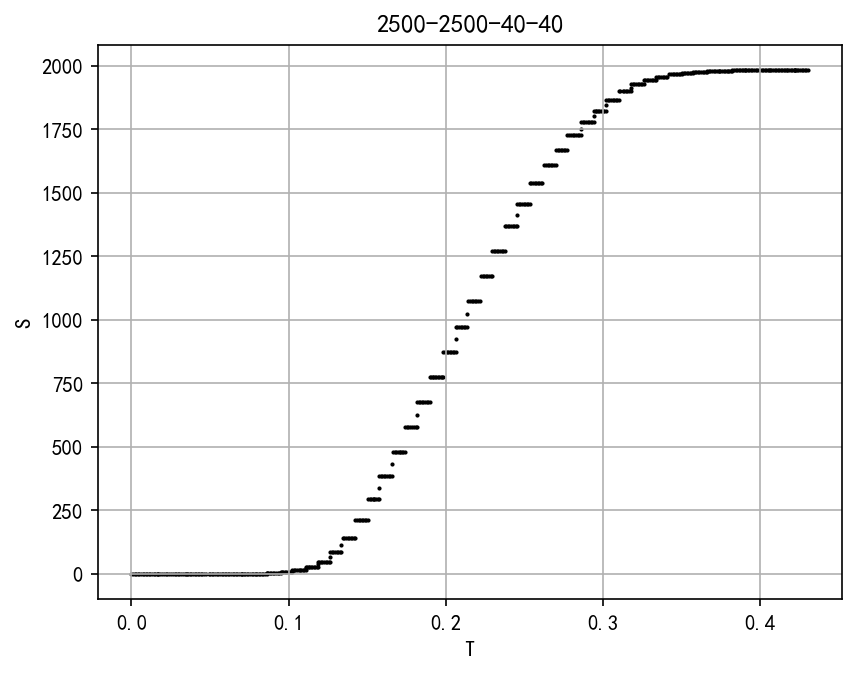

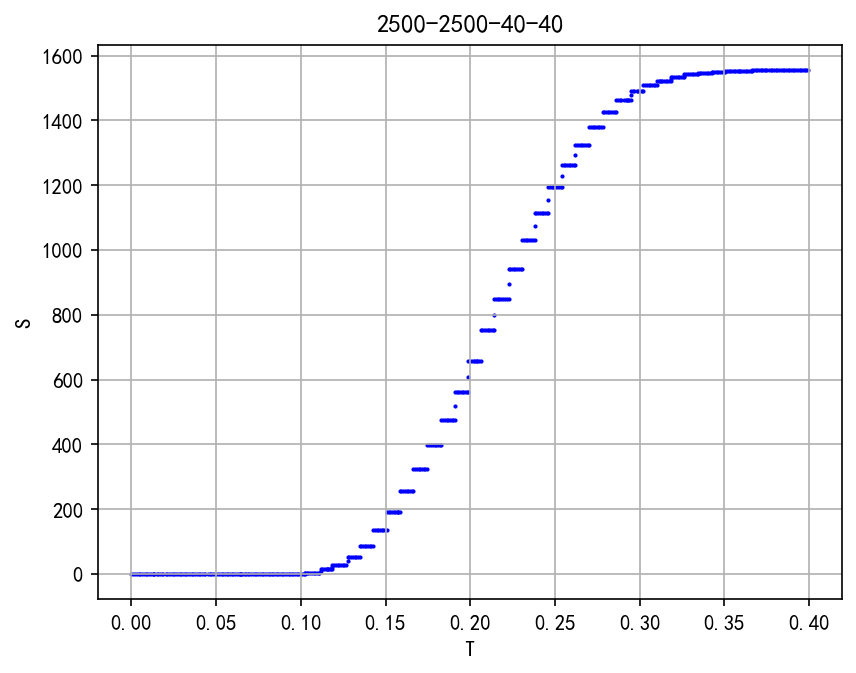

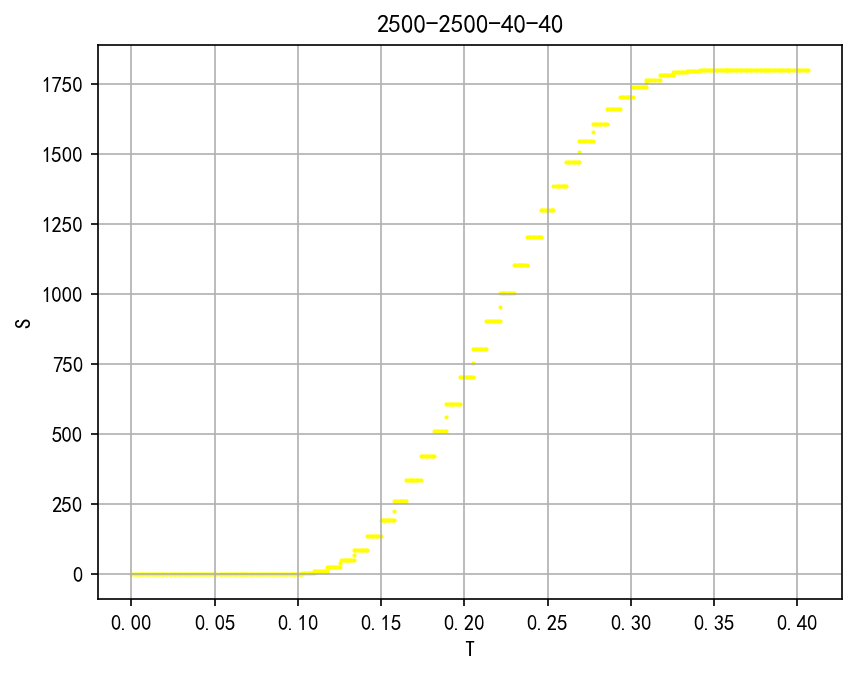

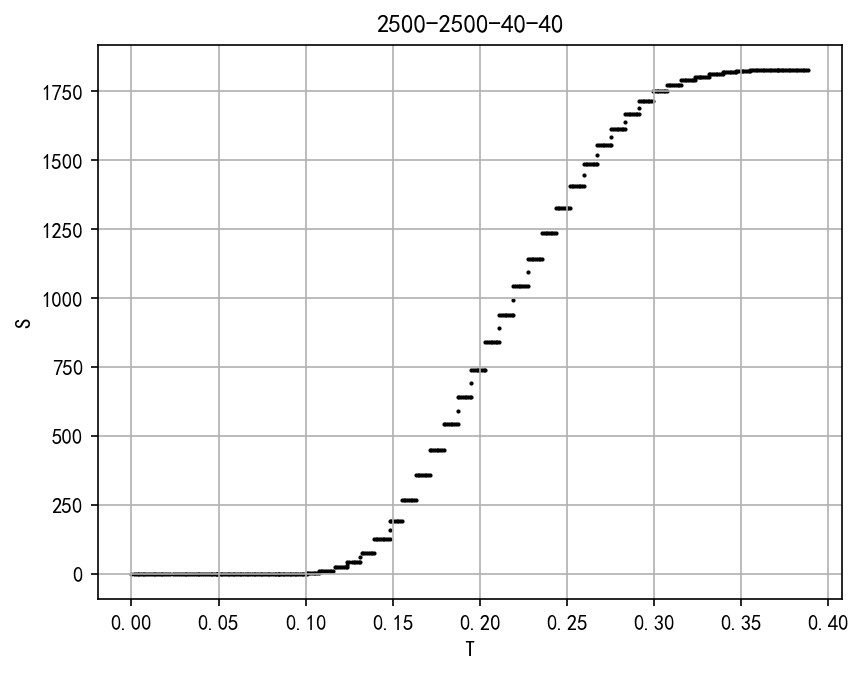

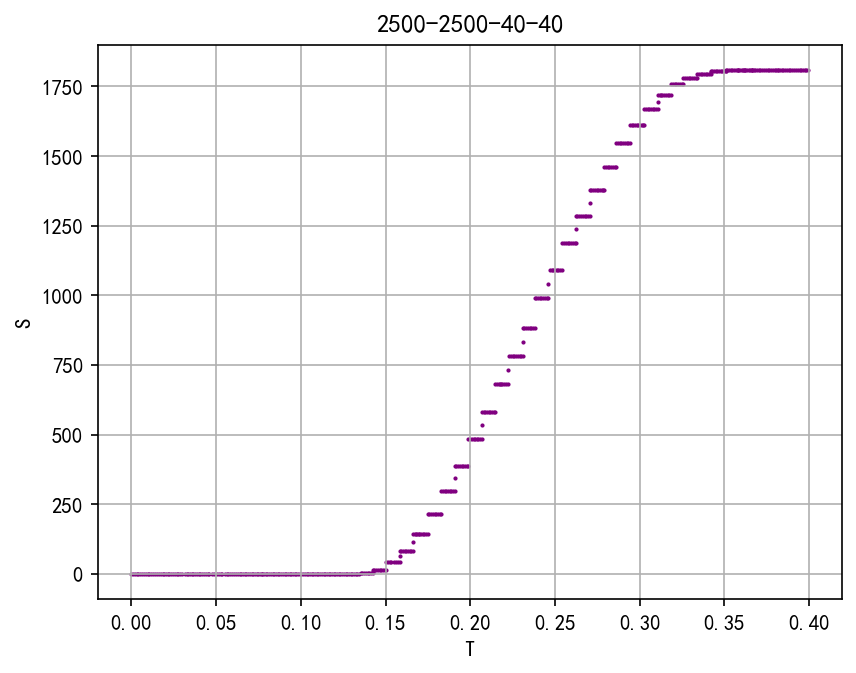

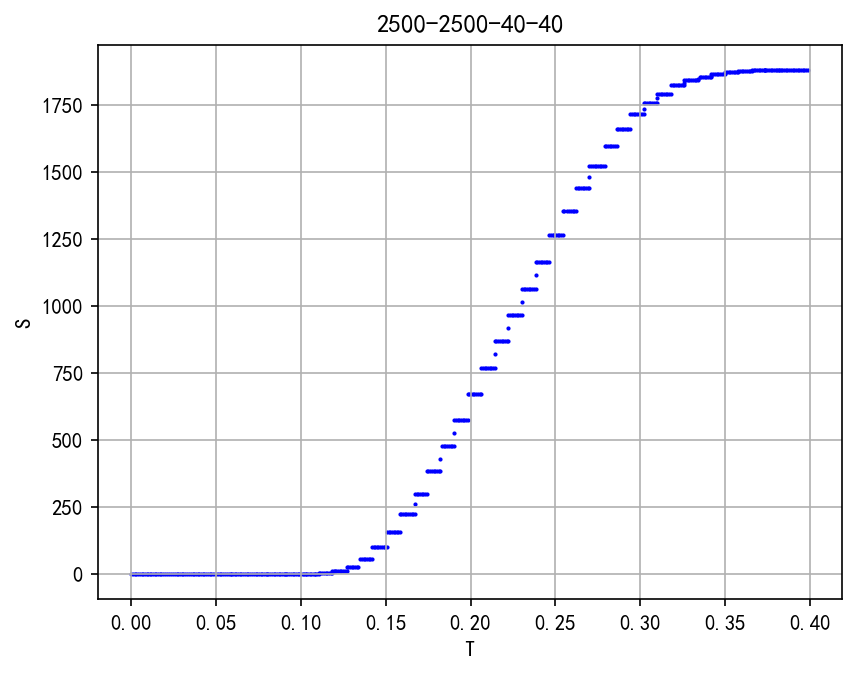

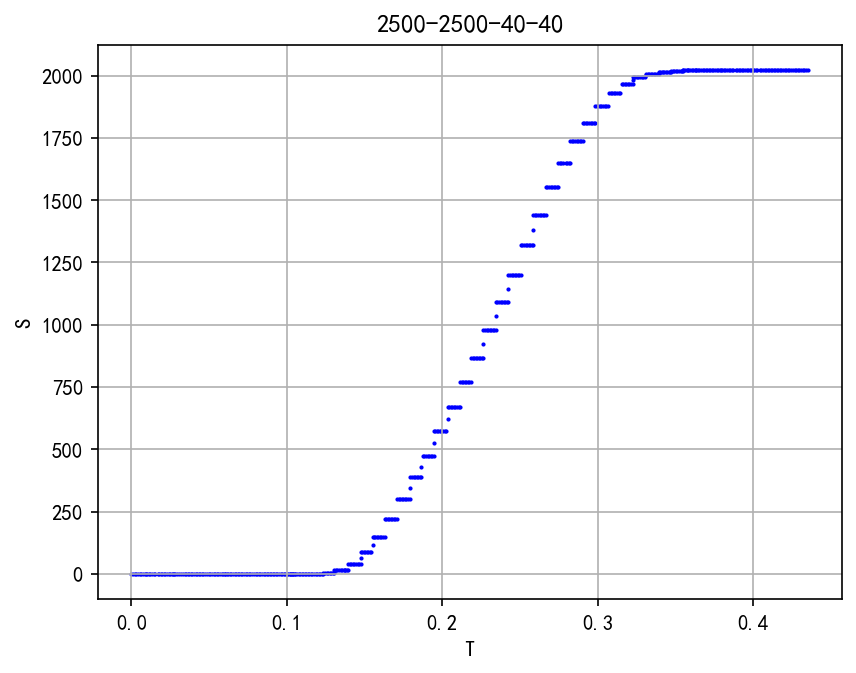

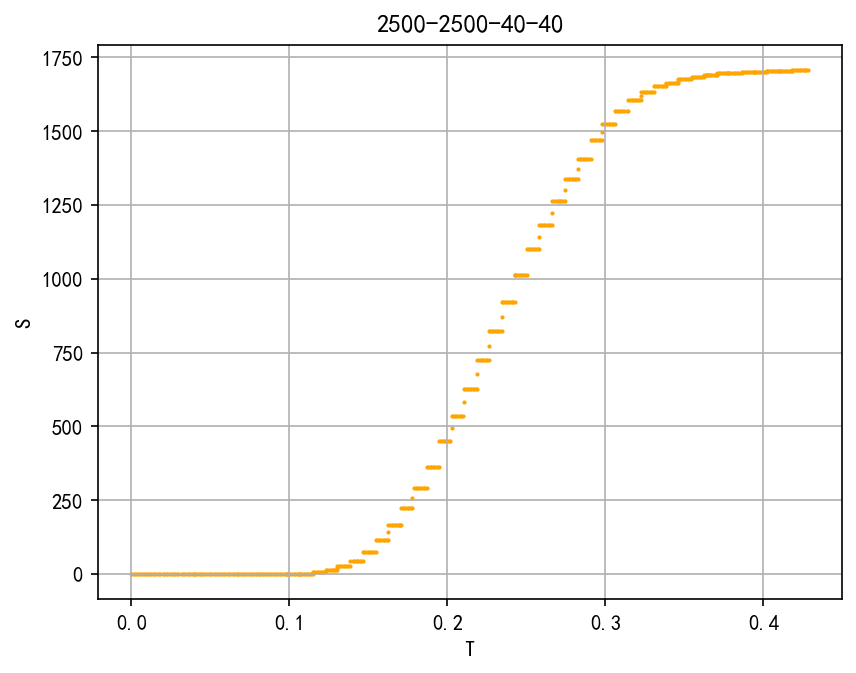

In [200]:
colors=[
    'red','orange','yellow','green','blue','purple','black',
]
#plt.figure(dpi=300)
for i in range(len(T)):
    plt.figure(dpi=150)
    plt.scatter(T[i],S[i], c=colors[random.randint(0,6)], label='L', s=1)
    #plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
    plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
    plt.xlabel('T')
    plt.ylabel('S')
    #plt.legend()
    plt.grid()
    plt.show()